In [18]:
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
import matplotlib.pylab as plt
import shap
import numpy as np
from utils import mnist_reader
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import keras

In [5]:
col_ch = 1 
dim = 28
normalize = 255 # Normalizing the RGB codes by dividing it to the max RGB value.
epochs = 20

BG_size = 10000

beg, end = BG_size+5, BG_size+10

In [6]:
names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [7]:
x_train, y_train = mnist_reader.load_mnist('data', dim, kind='train')
x_test, y_test = mnist_reader.load_mnist('data', dim, kind='t10k')

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], dim, dim, col_ch)
x_test = x_test.reshape(x_test.shape[0], dim, dim, col_ch)
input_shape = (dim, dim, col_ch)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= normalize
x_test /= normalize
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=epochs)


Epoch 1/20
60000/60000 [==============================] - 40s 667us/step - loss: 0.4229 - accuracy: 0.8469
Epoch 2/20
60000/60000 [==============================] - 38s 640us/step - loss: 0.2899 - accuracy: 0.8959
Epoch 3/20
60000/60000 [==============================] - 38s 639us/step - loss: 0.2421 - accuracy: 0.9110
Epoch 4/20
60000/60000 [==============================] - 40s 659us/step - loss: 0.2116 - accuracy: 0.9218
Epoch 5/20
60000/60000 [==============================] - 38s 639us/step - loss: 0.1862 - accuracy: 0.9316
Epoch 6/20
60000/60000 [==============================] - 39s 655us/step - loss: 0.1677 - accuracy: 0.9372
Epoch 7/20
60000/60000 [==============================] - 37s 622us/step - loss: 0.1502 - accuracy: 0.9443
Epoch 8/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.1341 - accuracy: 0.9489
Epoch 9/20
60000/60000 [==============================] - 38s 626us/step - loss: 0.1231 - accuracy: 0.9528
Epoch 10/20
60000/60000 [===========

In [11]:
background = x_train[np.random.choice(x_train.shape[0], BG_size, replace=False)]
background = x_train[0:BG_size]

In [12]:
explainer = shap.DeepExplainer(model, background)

In [13]:
dta = x_train[beg:end]
ydta = y_train[beg:end]

In [14]:
shap_values = explainer.shap_values(dta)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


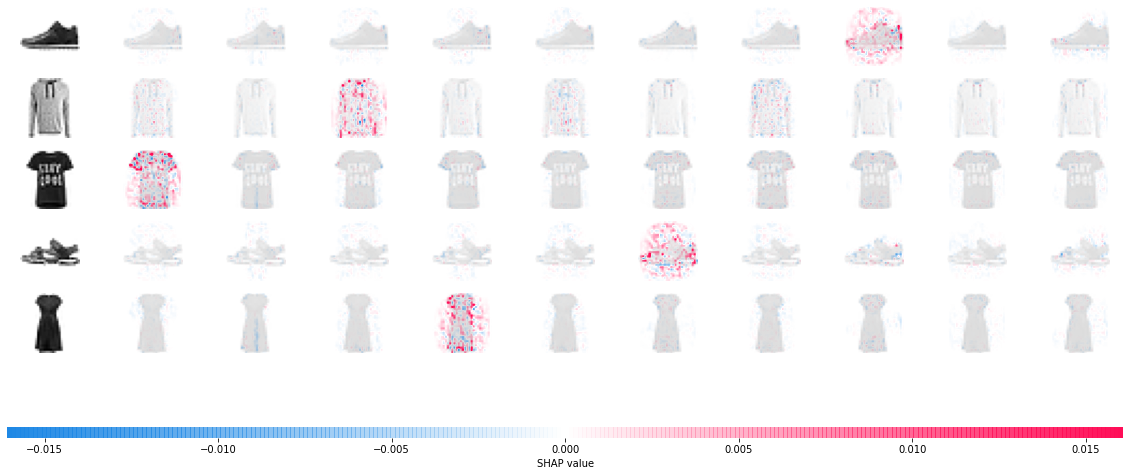

In [15]:
shap.image_plot(shap_values, -dta)

In [16]:
for ind in range(len(dta)):

    pred = model.predict(dta[ind].reshape(1,dim,dim,1))
    # plt.figure()
    # plt.imshow(dta[ind].reshape(dim, dim),cmap='Greys')
    # print('prediction', pred.argmax(), names[ pred.argmax()],'actual', ydta[ind], names[ydta[ind]])
    print('prediction', names[pred.argmax()],'actual', names[ydta[ind]])

prediction Sneaker actual Sneaker
prediction Pullover actual Pullover
prediction T-shirt/top actual T-shirt/top
prediction Sandal actual Sandal
prediction Dress actual Dress


In [17]:
for c, i in enumerate(names):
    print(c, i)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
